In [16]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

'''
IRIS plant data 

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica
      
'''

In [17]:
#Load Iris Dataset
column_names=["sepal_length","sepal_width","petal_length","petal_width","class"]
iris=pd.read_csv("../data/iris.csv",names=column_names)
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
X=iris[["sepal_length","sepal_width","petal_length","petal_width"]]
Y=iris[["class"]]

In [19]:
X_train, X_test, Y_train,Y_test  =   train_test_split(X, Y, test_size=.4,random_state=40)

In [20]:
print X_train.shape
print X_test.shape

(90, 4)
(60, 4)


In [21]:
X_train.head(5)

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,0.2
143,6.8,3.2,5.9,2.3
61,5.9,3.0,4.2,1.5
10,5.4,3.7,1.5,0.2
112,6.8,3.0,5.5,2.1


In [22]:
Y_train.head(5)

,class
4,Iris-setosa
143,Iris-virginica
61,Iris-versicolor
10,Iris-setosa
112,Iris-virginica


In [23]:
#Build model on training data
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(X_train,Y_train)


C:\Users\212458098\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [24]:
predictions=classifier.predict(X_test)
predictions

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicol

In [25]:
print sklearn.metrics.confusion_matrix(Y_test,predictions)
print sklearn.metrics.accuracy_score(Y_test, predictions)



[[20  0  0]
 [ 0 20  0]
 [ 0  3 17]]
0.95


C:\Users\212458098\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
C:\Users\212458098\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Relative Feature importance
[ 0.07152324  0.04414324  0.39225078  0.49208274]





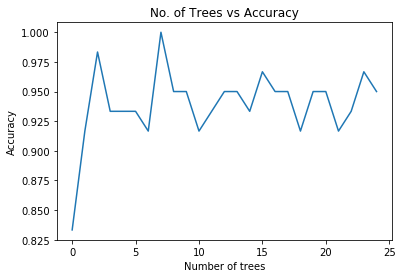

In [32]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)
# display the relative importance of each attribute
print "Relative Feature importance"
print(model.feature_importances_)
print "\n\n"


"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(X_train,Y_train)
   predictions=classifier.predict(X_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(Y_test, predictions)
   
plt.cla()
plt.title("No. of Trees vs Accuracy")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.plot(trees, accuracy)
plt.show()

